In [88]:
import numpy as np
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# bulundugumuz klasordeki tum excellleri exel formatinda aliyoruz

In [2]:
files = os.listdir("./")
filesxlxs = [pd.ExcelFile(i) for i in files  if i.endswith ('.xlsx')] 
filesxlxs_names = [i[:-5] for i in files if i[-5:] =='.xlsx']

In [3]:
columns = ['Type', 'EAN', 'Artikelomschrijving', 'Datum', 'Bestelnummer', 'Aantal','Tarief-\ngroep', 'Tarief','Bedrag', 'BTW %', 'Btw-bedrag', 'Bedrag\n(incl. BTW)', 'Land van verzending', 'Reden', 'Opmerking']
df_all = pd.DataFrame(columns=columns)

for i in filesxlxs:                             
    df = pd.read_excel(i, i.sheet_names[1])
    df.columns = list(df.iloc[4])
    df = df[5:]
    df = df[df.Bestelnummer.isna() == False ]
    df_all = pd.concat([df_all,df])
    

In [4]:
df_all.describe().T

,count,unique,top,freq
Type,3130,13,Commissie,1267
EAN,3016,203,8001841063188,289
Artikelomschrijving,3016,220,Pampers Sensitive Billendoekjes - 1200 stuks,287
Datum,3130,1316,2020-03-24 02:04:43,18
Bestelnummer,3130,1262,1108078530,9
Aantal,3130,4,1,3073
Tarief-\ngroep,224,6,M,73
Tarief,3130,443,4.69,156
Bedrag,3130,554,4.69,155
BTW %,3130,2,21,1767


In [5]:
type_list = df_all['Type'].unique().tolist()
type_list

['Verkoopprijs artikel(en), ontvangen van kopers en door bol.com door te storten',
 'Correctie verkoopprijs artikel(en)',
 'Compensatie',
 'Bijdrage aan pakketzegel(s)',
 'Bijdrage aan pakketzegel(s) Koninklijke PostNL B.V.',
 'Bijdrage aan retourzegel(s)',
 'Commissie',
 'Correctie commissie',
 'Verzendkosten',
 'Pick&pack kosten',
 'Compensatie zoekgeraakte artikel(en)',
 'Correctie verzendkosten',
 'Correctie pick&pack kosten']

In [6]:
bestels = df_all[['Bestelnummer','EAN', 'Artikelomschrijving', 'Datum', 'Aantal','Land van verzending']]
bestels

,Bestelnummer,EAN,Artikelomschrijving,Datum,Aantal,Land van verzending
5,2521148300,8001090968029,Pampers Luierbroekjes Baby Dry Nappy Pants Maa...,2019-09-02 23:26:01,1,NL
6,2521667470,8001090968029,Pampers Luierbroekjes Baby Dry Nappy Pants Maa...,2019-09-03 12:40:55,1,NL
7,2522882790,7440852284211,Dell Latitude E7240 | Intel Core i5 | 4 GB | 2...,2019-09-04 10:50:44,1,NL
8,2523847810,8001090968029,Pampers Luierbroekjes Baby Dry Nappy Pants Maa...,2019-09-04 13:57:06,1,NL
9,2524605940,9005613134358,Emporia Flip Basic - Zwart,2019-09-05 12:32:43,1,NL
...,...,...,...,...,...,...
77,2619652670,3660619403707,Seagate Fast SSD - 1TB,2019-10-29 15:26:14,1,NL
79,2584140400,8001090968029,Pampers Luierbroekjes Baby Dry Nappy Pants Maa...,2019-10-15 10:45:41,1,NL
80,2601671860,5028965708118,Numatic Henry HVN-200-11 - Stofzuiger met zak ...,2019-10-24 23:45:31.063000,1,NL
81,2572228360,3700342409789,Krups NESCAFÉ Dolce Gusto Piccolo KP1006 - Kof...,2019-10-28 21:30:10.796000,1,NL


In [7]:
EAN_NaN = bestels[bestels.EAN.isna() == True]
EAN_NaN = EAN_NaN['Bestelnummer']
EAN_NaN

39     2533435290
5      1105133795
6      1105223302
7      1105427419
8      1105538185
          ...    
79     1111036029
80     1110329568
81     1111574416
82     1111666471
480    1108078530
Name: Bestelnummer, Length: 114, dtype: object

In [8]:
EAN_not_NaN = bestels[bestels.EAN.isna() == False ]
EAN_not_NaN

,Bestelnummer,EAN,Artikelomschrijving,Datum,Aantal,Land van verzending
5,2521148300,8001090968029,Pampers Luierbroekjes Baby Dry Nappy Pants Maa...,2019-09-02 23:26:01,1,NL
6,2521667470,8001090968029,Pampers Luierbroekjes Baby Dry Nappy Pants Maa...,2019-09-03 12:40:55,1,NL
7,2522882790,7440852284211,Dell Latitude E7240 | Intel Core i5 | 4 GB | 2...,2019-09-04 10:50:44,1,NL
8,2523847810,8001090968029,Pampers Luierbroekjes Baby Dry Nappy Pants Maa...,2019-09-04 13:57:06,1,NL
9,2524605940,9005613134358,Emporia Flip Basic - Zwart,2019-09-05 12:32:43,1,NL
...,...,...,...,...,...,...
77,2619652670,3660619403707,Seagate Fast SSD - 1TB,2019-10-29 15:26:14,1,NL
79,2584140400,8001090968029,Pampers Luierbroekjes Baby Dry Nappy Pants Maa...,2019-10-15 10:45:41,1,NL
80,2601671860,5028965708118,Numatic Henry HVN-200-11 - Stofzuiger met zak ...,2019-10-24 23:45:31.063000,1,NL
81,2572228360,3700342409789,Krups NESCAFÉ Dolce Gusto Piccolo KP1006 - Kof...,2019-10-28 21:30:10.796000,1,NL


In [9]:
EAN_Full = pd.merge(EAN_NaN,EAN_not_NaN, how='left',on=['Bestelnummer'])
EAN_Full = EAN_Full.drop_duplicates(subset = 'Bestelnummer')
EAN_Full

,Bestelnummer,EAN,Artikelomschrijving,Datum,Aantal,Land van verzending
0,2533435290,4053162762831,Dell Latitude E7250 - Laptop,2019-09-11 22:19:22,1,NL
5,1105133795,8710103831662,"Philips Norelco OneBlade Trimmen, scheren en s...",2020-04-23 19:57:36,1,NL
8,1105223302,8710103814139,Philips Sonicare DiamondClean HX9363/63 - Elek...,2020-04-24 01:43:26,1,NL
11,1105427419,8710103863175,Philips Sonicare ProtectiveClean 4300 Elektris...,2020-04-24 22:49:35,1,NL
14,1105538185,8710103814139,Philips Sonicare DiamondClean HX9363/63 - Elek...,2020-04-25 23:12:35,1,NL
...,...,...,...,...,...,...
332,1110242681,8710103840053,Philips Daily Airfryer HD9216/40 - Hetelucht f...,2020-05-14 14:19:13,1,NL
335,1111036029,8710103831662,"Philips Norelco OneBlade Trimmen, scheren en s...",2020-05-18 00:45:49,1,NL
338,1110329568,8710103831662,"Philips Norelco OneBlade Trimmen, scheren en s...",2020-05-18 16:13:47,1,NL
341,1111574416,8710103787327,Philips HX9382/09,2020-05-19 22:14:53,1,NL


In [10]:
bestels = pd.concat([EAN_not_NaN, EAN_Full], ignore_index=True)
bestels

,Bestelnummer,EAN,Artikelomschrijving,Datum,Aantal,Land van verzending
0,2521148300,8001090968029,Pampers Luierbroekjes Baby Dry Nappy Pants Maa...,2019-09-02 23:26:01,1,NL
1,2521667470,8001090968029,Pampers Luierbroekjes Baby Dry Nappy Pants Maa...,2019-09-03 12:40:55,1,NL
2,2522882790,7440852284211,Dell Latitude E7240 | Intel Core i5 | 4 GB | 2...,2019-09-04 10:50:44,1,NL
3,2523847810,8001090968029,Pampers Luierbroekjes Baby Dry Nappy Pants Maa...,2019-09-04 13:57:06,1,NL
4,2524605940,9005613134358,Emporia Flip Basic - Zwart,2019-09-05 12:32:43,1,NL
...,...,...,...,...,...,...
3124,1110242681,8710103840053,Philips Daily Airfryer HD9216/40 - Hetelucht f...,2020-05-14 14:19:13,1,NL
3125,1111036029,8710103831662,"Philips Norelco OneBlade Trimmen, scheren en s...",2020-05-18 00:45:49,1,NL
3126,1110329568,8710103831662,"Philips Norelco OneBlade Trimmen, scheren en s...",2020-05-18 16:13:47,1,NL
3127,1111574416,8710103787327,Philips HX9382/09,2020-05-19 22:14:53,1,NL


In [11]:
types = [i for i in range(len(type_list)) ]
for i in range(len(type_list)):
    types[i] = df_all[df_all['Type'] == str(type_list[i])]
    types[i] = types[i][['Bestelnummer','Bedrag\n(incl. BTW)']]
    


In [12]:
type_list

['Verkoopprijs artikel(en), ontvangen van kopers en door bol.com door te storten',
 'Correctie verkoopprijs artikel(en)',
 'Compensatie',
 'Bijdrage aan pakketzegel(s)',
 'Bijdrage aan pakketzegel(s) Koninklijke PostNL B.V.',
 'Bijdrage aan retourzegel(s)',
 'Commissie',
 'Correctie commissie',
 'Verzendkosten',
 'Pick&pack kosten',
 'Compensatie zoekgeraakte artikel(en)',
 'Correctie verzendkosten',
 'Correctie pick&pack kosten']

In [13]:
types[0]=types[0].rename(columns={'Bedrag\n(incl. BTW)':'Verzendkosten'})
types[1]=types[1].rename(columns={'Bedrag\n(incl. BTW)':'Verkoopprijs'})
types[2]=types[2].rename(columns={'Bedrag\n(incl. BTW)':'Corr_Verzendkosten'})
types[3]=types[3].rename(columns={'Bedrag\n(incl. BTW)':'Corr_Verkoopprijs'})
types[4]=types[4].rename(columns={'Bedrag\n(incl. BTW)':'DHL_DPD'})
types[5]=types[5].rename(columns={'Bedrag\n(incl. BTW)':'PostNL'})
types[6]=types[6].rename(columns={'Bedrag\n(incl. BTW)':'Retourzegel'})
types[7]=types[7].rename(columns={'Bedrag\n(incl. BTW)':'Pick&pack'})
types[8]=types[8].rename(columns={'Bedrag\n(incl. BTW)':'Corr_Pick&pack'})
types[9]=types[9].rename(columns={'Bedrag\n(incl. BTW)':'Commissie'})
types[10]=types[10].rename(columns={'Bedrag\n(incl. BTW)':'Corr_Commissie'})
types[11]=types[11].rename(columns={'Bedrag\n(incl. BTW)':'Compensatie_Zoekgeraakte '})
types[12]=types[12].rename(columns={'Bedrag\n(incl. BTW)':'Compensatie'})


In [14]:
display(types[0].head())
display(types[1].head())
display(types[2].head())
display(types[3].head())
display(types[4].head())
display(types[5].head())
display(types[6].head())
display(types[7].head())
display(types[8].head())
display(types[9].head())
display(types[10].head())
display(types[11].head())
display(types[12].head())


,Bestelnummer,Verzendkosten
5,2521148300,-39.99
6,2521667470,-39.99
7,2522882790,-299.99
8,2523847810,-39.99
9,2524605940,-53


,Bestelnummer,Verkoopprijs
34,2521667470,39.99
35,2533435290,435
36,2556639670,39.99
37,2505082690,299.99
325,2908158230,26


,Bestelnummer,Corr_Verzendkosten
39,2533435290,-4.69
40,2556639670,-6.4
19,2486682720,-3.8
20,2484097070,-3.8
428,2857320800,-71.27


,Bestelnummer,Corr_Verkoopprijs
42,2521148300,5.6749
43,2521667470,5.6749
44,2523847810,5.6749
45,2524605940,5.6749
46,2525091210,5.6749


,Bestelnummer,DHL_DPD
53,2522882790,6.4
54,2527556690,6.4
55,2530094470,6.4
56,2537736300,6.4
57,2537691560,6.4


,Bestelnummer,PostNL
68,2521667470,2.4805
69,2505082690,2.4805
365,2912003710,2.5773
366,2906945830,2.5773
367,2910492770,2.5773


,Bestelnummer,Retourzegel
71,2521148300,7
72,2521667470,7
73,2522882790,18
74,2523847810,7
75,2524605940,1.5


,Bestelnummer,Pick&pack
100,2521667470,-7
101,2533435290,-24.75
102,2556639670,-7
103,2505082690,-18
692,2908158230,-4.9


,Bestelnummer,Corr_Pick&pack
5,1105133795,3.6905
6,1105223302,3.6905
7,1105427419,3.6905
8,1105538185,3.6905
9,1105473111,3.6905


,Bestelnummer,Commissie
464,1105133795,2.3595
465,1105223302,2.3595
466,1105427419,2.3595
467,1105538185,2.3595
468,1105473111,2.3595


,Bestelnummer,Corr_Commissie
784,2953841800,-26.6529
875,1108078530,-66.3223
83,2584140400,-24.7872


,Bestelnummer,Compensatie_Zoekgeraakte
480,1108078530,-4.235


,Bestelnummer,Compensatie
609,1108078530,-2.783


result = pd.merge(left, right, how='left', on=['key1', 'key2'])

In [15]:
result=pd.merge(bestels,types[0], how='left',on=['Bestelnummer'])

In [16]:
result

,Bestelnummer,EAN,Artikelomschrijving,Datum,Aantal,Land van verzending,Verzendkosten
0,2521148300,8001090968029,Pampers Luierbroekjes Baby Dry Nappy Pants Maa...,2019-09-02 23:26:01,1,NL,-39.99
1,2521667470,8001090968029,Pampers Luierbroekjes Baby Dry Nappy Pants Maa...,2019-09-03 12:40:55,1,NL,-39.99
2,2522882790,7440852284211,Dell Latitude E7240 | Intel Core i5 | 4 GB | 2...,2019-09-04 10:50:44,1,NL,-299.99
3,2523847810,8001090968029,Pampers Luierbroekjes Baby Dry Nappy Pants Maa...,2019-09-04 13:57:06,1,NL,-39.99
4,2524605940,9005613134358,Emporia Flip Basic - Zwart,2019-09-05 12:32:43,1,NL,-53
...,...,...,...,...,...,...,...
3143,1110242681,8710103840053,Philips Daily Airfryer HD9216/40 - Hetelucht f...,2020-05-14 14:19:13,1,NL,-107
3144,1111036029,8710103831662,"Philips Norelco OneBlade Trimmen, scheren en s...",2020-05-18 00:45:49,1,NL,-59
3145,1110329568,8710103831662,"Philips Norelco OneBlade Trimmen, scheren en s...",2020-05-18 16:13:47,1,NL,-59
3146,1111574416,8710103787327,Philips HX9382/09,2020-05-19 22:14:53,1,NL,-159.99


In [17]:
for i in range(1,13):
    result=pd.merge(result,types[i], how='left',on=['Bestelnummer'])

In [18]:
result.tail()

,Bestelnummer,EAN,Artikelomschrijving,Datum,Aantal,Land van verzending,Verzendkosten,Verkoopprijs,Corr_Verzendkosten,Corr_Verkoopprijs,DHL_DPD,PostNL,Retourzegel,Pick&pack,Corr_Pick&pack,Commissie,Corr_Commissie,Compensatie_Zoekgeraakte,Compensatie
3185,1110242681,8710103840053,Philips Daily Airfryer HD9216/40 - Hetelucht f...,2020-05-14 14:19:13,1,NL,-107,NaN,NaN,NaN,NaN,NaN,7.42,NaN,4.235,2.783,NaN,NaN,NaN
3186,1111036029,8710103831662,"Philips Norelco OneBlade Trimmen, scheren en s...",2020-05-18 00:45:49,1,NL,-59,NaN,NaN,NaN,NaN,NaN,4.54,NaN,3.6905,2.3595,NaN,NaN,NaN
3187,1110329568,8710103831662,"Philips Norelco OneBlade Trimmen, scheren en s...",2020-05-18 16:13:47,1,NL,-59,NaN,NaN,NaN,NaN,NaN,4.54,NaN,3.6905,2.3595,NaN,NaN,NaN
3188,1111574416,8710103787327,Philips HX9382/09,2020-05-19 22:14:53,1,NL,-159.99,NaN,NaN,NaN,NaN,NaN,10.6,NaN,3.6905,2.3595,NaN,NaN,NaN
3189,1111666471,8710103831662,"Philips Norelco OneBlade Trimmen, scheren en s...",2020-05-20 10:58:53,1,BE,-59,NaN,NaN,NaN,NaN,NaN,4.54,NaN,3.6905,2.3595,NaN,NaN,NaN


In [19]:
result = result.drop_duplicates(subset = 'Bestelnummer')
result.loc[result.duplicated(keep= False),:]
result['Datum']=result['Datum'].dt.date
result.describe().T

,count,unique,top,freq
Bestelnummer,1262,1262,1108273078,1
EAN,1262,203,8001841063188,143
Artikelomschrijving,1262,217,Pampers Sensitive Billendoekjes - 1200 stuks,142
Datum,1262,197,2020-04-16,57
Aantal,1262,4,1,1236
Land van verzending,1260,2,NL,1162
Verzendkosten,1262,225,-35,143
Verkoopprijs,56,38,65,5
Corr_Verzendkosten,5,4,-3.8,2
Corr_Verkoopprijs,177,2,5.6749,155


In [20]:
result

,Bestelnummer,EAN,Artikelomschrijving,Datum,Aantal,Land van verzending,Verzendkosten,Verkoopprijs,Corr_Verzendkosten,Corr_Verkoopprijs,DHL_DPD,PostNL,Retourzegel,Pick&pack,Corr_Pick&pack,Commissie,Corr_Commissie,Compensatie_Zoekgeraakte,Compensatie
0,2521148300,8001090968029,Pampers Luierbroekjes Baby Dry Nappy Pants Maa...,2019-09-02,1,NL,-39.99,NaN,NaN,5.6749,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN
1,2521667470,8001090968029,Pampers Luierbroekjes Baby Dry Nappy Pants Maa...,2019-09-03,1,NL,-39.99,39.99,NaN,5.6749,NaN,2.4805,7,-7,NaN,NaN,NaN,NaN,NaN
2,2522882790,7440852284211,Dell Latitude E7240 | Intel Core i5 | 4 GB | 2...,2019-09-04,1,NL,-299.99,NaN,NaN,NaN,6.4,NaN,18,NaN,NaN,NaN,NaN,NaN,NaN
3,2523847810,8001090968029,Pampers Luierbroekjes Baby Dry Nappy Pants Maa...,2019-09-04,1,NL,-39.99,NaN,NaN,5.6749,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN
4,2524605940,9005613134358,Emporia Flip Basic - Zwart,2019-09-05,1,NL,-53,NaN,NaN,5.6749,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3023,2610347520,8001090968029,Pampers Luierbroekjes Baby Dry Nappy Pants Maa...,2019-10-22,1,NL,-39.99,NaN,NaN,5.6749,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN
3025,2609657190,3045386352036,Tefal ActiFry YV9601 - Hetelucht friteuse - Zwart,2019-10-23,1,NL,-184.99,NaN,NaN,NaN,NaN,NaN,12.1,NaN,NaN,NaN,NaN,NaN,NaN
3026,2613412000,8001090968081,Pampers Luierbroekjes Baby Dry Nappy Pants Maa...,2019-10-23,1,NL,-39.99,NaN,NaN,5.6749,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN
3027,2617561300,3045386352036,Tefal ActiFry YV9601 - Hetelucht friteuse - Zwart,2019-10-26,1,NL,-184.99,NaN,NaN,NaN,NaN,NaN,12.1,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
info = pd.ExcelFile('.output/Geslacht_Provincie.xlsx')
df_2 = pd.read_excel(info, info.sheet_names[0])
df_2

,Bestelnummer,Geslacht,Provincie
0,1106872706,heer,Overijssel
1,1107031838,heer,Limburg
2,1106915346,mevrouw,Noord-Holland
3,1106139425,mevrouw,Utrecht
4,1107372234,heer,Zuid-Holland
...,...,...,...
1257,1106419646,heer,Noord-Brabant
1258,1106472014,heer,Groningen
1259,1106672131,heer,Groningen
1260,1106861912,mevrouw,Friesland


In [22]:
Geslacht=[]
kind=['heer','mevrouw']
for i in range(len(result.Bestelnummer)):
    x=random.choice(kind)    
    Geslacht.append(x)
result['Geslacht']=Geslacht

In [23]:
Provincie=[]
kind=['Drenthe', 'Gelderland', 'Groningen', 'Flevoland', 'Friesland', 'Limburg', 'Noord-Brabant', 'Noord-Holland', 'Noord-Holland','Overijssel', 'Utrecht', 'Utrecht', 'Zeeland', 'Zuid-Holland', 'Zuid-Holland']
for i in range(len(result.Bestelnummer)):
    x=random.choice(kind)    
    Provincie.append(x)
result['Provincie']=Provincie

In [24]:
result = result[['Bestelnummer', 'EAN', 'Artikelomschrijving', 'Datum', 'Geslacht', 'Provincie','Land van verzending','Aantal','Verkoopprijs','Corr_Verkoopprijs','Commissie','Corr_Commissie','Verzendkosten','Corr_Verzendkosten', 'DHL_DPD', 'PostNL','Retourzegel', 'Pick&pack', 'Corr_Pick&pack',  'Compensatie_Zoekgeraakte ', 'Compensatie',]]
result.to_excel(".output/output.xlsx")
result.describe().T

,count,unique,top,freq
Bestelnummer,1262,1262,1108273078,1
EAN,1262,203,8001841063188,143
Artikelomschrijving,1262,217,Pampers Sensitive Billendoekjes - 1200 stuks,142
Datum,1262,197,2020-04-16,57
Geslacht,1262,2,heer,672
Provincie,1262,12,Noord-Holland,169
Land van verzending,1260,2,NL,1162
Aantal,1262,4,1,1236
Verkoopprijs,56,38,65,5
Corr_Verkoopprijs,177,2,5.6749,155


In [25]:
result

,Bestelnummer,EAN,Artikelomschrijving,Datum,Geslacht,Provincie,Land van verzending,Aantal,Verkoopprijs,Corr_Verkoopprijs,...,Corr_Commissie,Verzendkosten,Corr_Verzendkosten,DHL_DPD,PostNL,Retourzegel,Pick&pack,Corr_Pick&pack,Compensatie_Zoekgeraakte,Compensatie
0,2521148300,8001090968029,Pampers Luierbroekjes Baby Dry Nappy Pants Maa...,2019-09-02,mevrouw,Friesland,NL,1,NaN,5.6749,...,NaN,-39.99,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN
1,2521667470,8001090968029,Pampers Luierbroekjes Baby Dry Nappy Pants Maa...,2019-09-03,mevrouw,Zeeland,NL,1,39.99,5.6749,...,NaN,-39.99,NaN,NaN,2.4805,7,-7,NaN,NaN,NaN
2,2522882790,7440852284211,Dell Latitude E7240 | Intel Core i5 | 4 GB | 2...,2019-09-04,mevrouw,Limburg,NL,1,NaN,NaN,...,NaN,-299.99,NaN,6.4,NaN,18,NaN,NaN,NaN,NaN
3,2523847810,8001090968029,Pampers Luierbroekjes Baby Dry Nappy Pants Maa...,2019-09-04,heer,Zuid-Holland,NL,1,NaN,5.6749,...,NaN,-39.99,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN
4,2524605940,9005613134358,Emporia Flip Basic - Zwart,2019-09-05,mevrouw,Gelderland,NL,1,NaN,5.6749,...,NaN,-53,NaN,NaN,NaN,1.5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3023,2610347520,8001090968029,Pampers Luierbroekjes Baby Dry Nappy Pants Maa...,2019-10-22,heer,Zuid-Holland,NL,1,NaN,5.6749,...,NaN,-39.99,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN
3025,2609657190,3045386352036,Tefal ActiFry YV9601 - Hetelucht friteuse - Zwart,2019-10-23,heer,Zeeland,NL,1,NaN,NaN,...,NaN,-184.99,NaN,NaN,NaN,12.1,NaN,NaN,NaN,NaN
3026,2613412000,8001090968081,Pampers Luierbroekjes Baby Dry Nappy Pants Maa...,2019-10-23,heer,Gelderland,NL,1,NaN,5.6749,...,NaN,-39.99,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN
3027,2617561300,3045386352036,Tefal ActiFry YV9601 - Hetelucht friteuse - Zwart,2019-10-26,mevrouw,Groningen,NL,1,NaN,NaN,...,NaN,-184.99,NaN,NaN,NaN,12.1,NaN,NaN,NaN,NaN


## Kac cesit urun satmisiz? En fazla hangi urunu satmisiz (hangi urune daha cok reklam verelim)? ilk bes urunun urun-siparis grafigi

In [44]:
# Kac cesit urun satmisiz?
len(result['Artikelomschrijving'].value_counts().index)

217

In [46]:
# Kac adet urun satmisiz?
result['Aantal'].sum()

1298

In [30]:
# ilk bes urunun urun-siparis grafigi
goods_name=result['Artikelomschrijving'].value_counts().index[:5]
goods_name

Index(['Pampers Sensitive Billendoekjes - 1200 stuks',
       'Monopoly Classic Nederland - Bordspel',
       'Oral-B PRO 2 2950N - Elektrische Tandenborstel - Zwart En Roze',
       'Philips GC026/00 - Ontpluizer',
       'Philips Avance Airfryer XXL HD9650/90 - Hetelucht friteuse'],
      dtype='object')

In [31]:
goods_quantity=result['Artikelomschrijving'].value_counts().values[:5]
goods_quantity
# birinci tum satislarin % 10 undan fazla satmis, ilk bes urun % 40 ini olusturuyor

array([142, 128,  95,  72,  38])

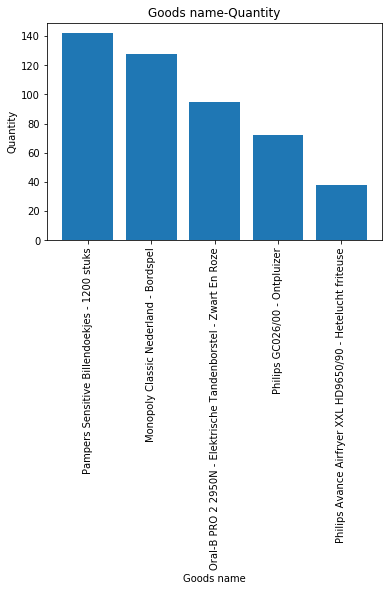

<Figure size 1440x1440 with 0 Axes>

In [40]:
fig, ax = plt.subplots()
fig=plt.figure(figsize=(20,20))
ax.set_title('Goods name-Quantity')
ax.set_xlabel('Goods name');
ax.set_xticklabels(goods_name, rotation=90)
ax.set_ylabel('Quantity');

ax.bar(goods_name,goods_quantity)
plt.show()

##  Ulke bazinda satislar nasil? province bazinda satislar nasil? 

In [49]:
result.groupby(['Land van verzending']).sum()

,Bestelnummer,EAN,Artikelomschrijving,Geslacht,Provincie,Aantal,Verkoopprijs,Corr_Verkoopprijs,Commissie,Corr_Commissie,Verzendkosten,Corr_Verzendkosten,DHL_DPD,PostNL,Retourzegel,Pick&pack,Corr_Pick&pack,Compensatie_Zoekgeraakte,Compensatie
Land van verzending,,,,,,,,,,,,,,,,,,,
BE,2504009680291002115029163343602919541410291709...,8001090968081401336873007257020161990558719925...,Pampers Luierbroekjes Baby Dry Nappy Pants Maa...,mevrouwmevrouwmevrouwmevrouwheermevrouwheerhee...,Noord-BrabantNoord-HollandFrieslandOverijsselZ...,105,228.99,104.3262,34.1825,0.000000,-4945.05,0.00,0.00,0.0000,600.760009,-19.450000,56.3255,0.000,0.000
NL,2521148300252166747025228827902523847810252460...,8001090968029800109096802974408522842118001090...,Pampers Luierbroekjes Baby Dry Nappy Pants Maa...,mevrouwmevrouwmevrouwheermevrouwmevrouwmevrouw...,FrieslandZeelandLimburgZuid-HollandGelderlandZ...,1191,4011.91,902.7931,214.1095,-117.762397,-65105.31,-18.69,200.15,98.1915,6649.090060,-353.029998,318.2300,-4.235,-2.783


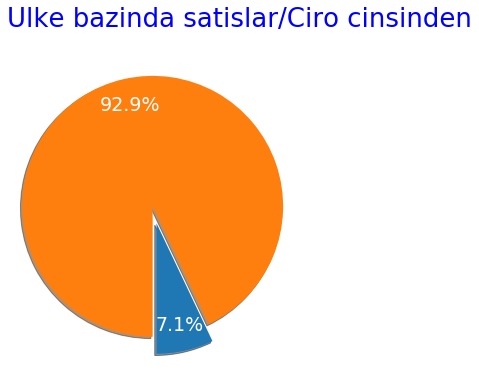

In [61]:
labels = 'BE','NL'
sizes = [4945,65105]
explode = (0.2, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', 
        pctdistance=0.8, labeldistance=1.1, 
        textprops={'fontsize': 19,'color':"w"},
        radius=1.5, shadow=True, startangle=270, rotatelabels=False
       )

ax1.set_title("Ulke bazinda satislar/Ciro cinsinden",color='b',size=26, x = 0.9, y = 1.3);
plt.show()
# belcika sayi olarak % 10, ciro olarak ise % 7 

In [64]:
result.groupby(['Provincie']).sum()['Verzendkosten'].index

Index(['Drenthe', 'Flevoland', 'Friesland', 'Gelderland', 'Groningen',
       'Limburg', 'Noord-Brabant', 'Noord-Holland', 'Overijssel', 'Utrecht',
       'Zeeland', 'Zuid-Holland'],
      dtype='object', name='Provincie')

In [76]:
result.groupby(['Provincie']).sum()['Verzendkosten'].sort_values()

Provincie
Zuid-Holland    -10135.57
Noord-Holland    -9476.50
Utrecht          -8579.24
Limburg          -5623.67
Friesland        -4940.79
Groningen        -4898.22
Gelderland       -4796.18
Zeeland          -4726.80
Noord-Brabant    -4711.80
Drenthe          -4160.14
Overijssel       -4081.79
Flevoland        -4067.65
Name: Verzendkosten, dtype: float64

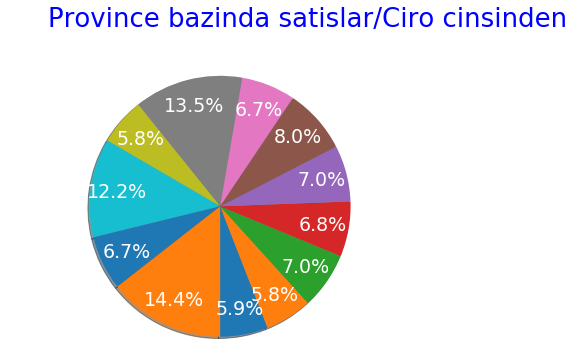

In [71]:
labels = 'Drenthe', 'Flevoland', 'Friesland', 'Gelderland', 'Groningen','Limburg', 'Noord-Brabant', 'Noord-Holland', 'Overijssel', 'Utrecht','Zeeland', 'Zuid-Holland'
sizes = [4160,4067,4940,4796,4898,5623,4711,9476,4081,8579,4726,10135]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', 
        pctdistance=0.8, labeldistance=1.1, 
        textprops={'fontsize': 19,'color':"w"},
        radius=1.5, shadow=True, startangle=270, rotatelabels=False
       )

ax1.set_title("Province bazinda satislar/Ciro cinsinden",color='b',size=26, x = 0.9, y = 1.3);
plt.show()
# 3 province satislarin % 40 ini olusturuyor

## satislar cinsiyete gore nasil dagiliyor? Ortalama ne kadar alis-veris yapiyorlar?

In [121]:
result['Geslacht'].value_counts()

heer       672
mevrouw    590
Name: Geslacht, dtype: int64

In [122]:
result['Geslacht'].value_counts(normalize=True)

heer       0.532488
mevrouw    0.467512
Name: Geslacht, dtype: float64

In [113]:
result_heer=result[result['Geslacht']=='heer']
result_mevrouw=result[result['Geslacht']=='mevrouw']

In [119]:
result_heer['Verzendkosten'].mean()

-55.73063988095237

{'whiskers': [<matplotlib.lines.Line2D at 0x1253a8b10>,
 'caps': [<matplotlib.lines.Line2D at 0x125384610>,
 'boxes': [<matplotlib.lines.Line2D at 0x12539ded0>],
 'medians': [<matplotlib.lines.Line2D at 0x1253a8bd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1253b5590>],
 'means': []}

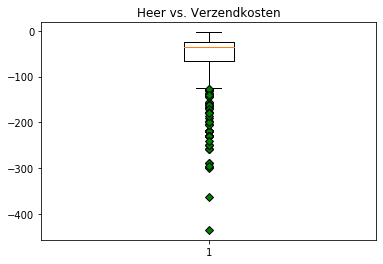

In [114]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig3, ax3 = plt.subplots()
ax3.set_title('Heer vs. Verzendkosten')
ax3.boxplot(result_heer['Verzendkosten'], flierprops=green_diamond)

In [120]:
result_mevrouw['Verzendkosten'].mean()

-55.50400000000018

{'whiskers': [<matplotlib.lines.Line2D at 0x1253cc6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1253c3ad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1253c3a90>],
 'medians': [<matplotlib.lines.Line2D at 0x1253d2c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1253ccd10>],
 'means': []}

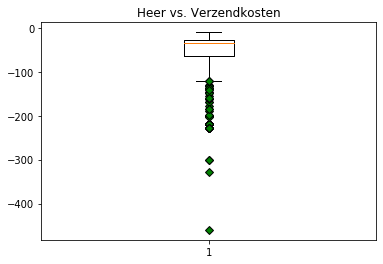

In [115]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig3, ax3 = plt.subplots()
ax3.set_title('Heer vs. Verzendkosten')
ax3.boxplot(result_mevrouw['Verzendkosten'], flierprops=green_diamond)

## Urunlerimizin fiyat araligi ne?

In [82]:
result['Verzendkosten'].max(), result['Verzendkosten'].min()

(-2.99, -459.98)

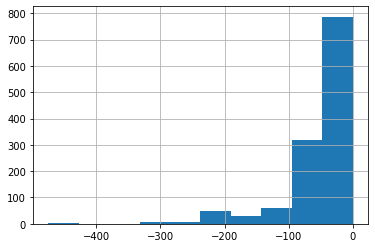

In [85]:
result['Verzendkosten'].hist(bins=10, range=(-475,0))